# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city for 8th July 2023
    city_url = f"{url}appid={weather_api_key}&units={units}&dt={1688774400}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | at taj
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | marudi
City not found. Skipping...
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | la'ie
Processing Record 9 of Set 1 | moberly
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | poyarkovo
Processing Record 13 of Set 1 | zouerate
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | forster
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | narasannapeta
Processing Record 20 of Set 1 | antalaha
Processing Record 21 of Set 1 | ushuaia
Pro

Processing Record 41 of Set 4 | puerto penasco
Processing Record 42 of Set 4 | umba
Processing Record 43 of Set 4 | ararat
Processing Record 44 of Set 4 | itarare
Processing Record 45 of Set 4 | ione
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | holbrook
Processing Record 49 of Set 4 | dehdasht
Processing Record 0 of Set 5 | constantia
Processing Record 1 of Set 5 | punta arenas
Processing Record 2 of Set 5 | aydincik
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | nova sintra
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | pechora
Processing Record 7 of Set 5 | shingu
Processing Record 8 of Set 5 | saipan
Processing Record 9 of Set 5 | ginir
Processing Record 10 of Set 5 | flekkefjord
Processing Record 11 of Set 5 | srednebelaya
Processing Record 12 of Set 5 | bardai
Processing Record 13 of Set 5 | remire-montjoly
Processing Record 14 of Set 5 | thunder bay
Pro

Processing Record 32 of Set 8 | yaren
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | gadzhiyevo
Processing Record 35 of Set 8 | akrehamn
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | boende
Processing Record 38 of Set 8 | minas de marcona
Processing Record 39 of Set 8 | newport
Processing Record 40 of Set 8 | alo
Processing Record 41 of Set 8 | ulsteinvik
Processing Record 42 of Set 8 | prince george
Processing Record 43 of Set 8 | queenstown
Processing Record 44 of Set 8 | karoi
Processing Record 45 of Set 8 | hasaki
Processing Record 46 of Set 8 | baganga
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | pundong
Processing Record 49 of Set 8 | simplicio mendes
Processing Record 0 of Set 9 | antigonish
Processing Record 1 of Set 9 | newman
Processing Record 2 of Set 9 | severnoye
Processing Record 3 of Set 9 | murowana goslina
Processing Record 4 of Set 9 | cartagena
Processing Record 5 of Set 9 | shubarshi
Processing R

City not found. Skipping...
Processing Record 22 of Set 12 | keflavik
Processing Record 23 of Set 12 | chelghoum el aid
Processing Record 24 of Set 12 | howard springs
Processing Record 25 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 26 of Set 12 | pudasjarvi
Processing Record 27 of Set 12 | zhumysker
Processing Record 28 of Set 12 | kralendijk
Processing Record 29 of Set 12 | camabatela
Processing Record 30 of Set 12 | sur
Processing Record 31 of Set 12 | campobello di mazara
Processing Record 32 of Set 12 | bamboo flat
Processing Record 33 of Set 12 | stanthorpe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#          "city":cities,
#          "Lat":city_lat,
#          "Lng":city_lng, 
#          "Max Temp":city_max_temp,
#          "Humidity":city_humidity,
#          "Cloudiness":city_clouds,
#          "Wind Speed":city_wind,
#          "Country":city_country,
#          "Date":city_date
# })


city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.13,77,83,14.72,TF,1690057285
1,at taj,24.2049,23.2857,31.68,14,4,5.13,LY,1690057450
2,waitangi,-43.9535,-176.5597,11.01,96,100,3.58,NZ,1690057451
3,avarua,-21.2078,-159.7750,22.03,94,100,9.26,CK,1690057452
4,edinburgh of the seven seas,-37.0676,-12.3116,12.70,72,12,8.91,SH,1690057454


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.13,77,83,14.72,TF,1690057285
1,at taj,24.2049,23.2857,31.68,14,4,5.13,LY,1690057450
2,waitangi,-43.9535,-176.5597,11.01,96,100,3.58,NZ,1690057451
3,avarua,-21.2078,-159.7750,22.03,94,100,9.26,CK,1690057452
4,edinburgh of the seven seas,-37.0676,-12.3116,12.70,72,12,8.91,SH,1690057454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

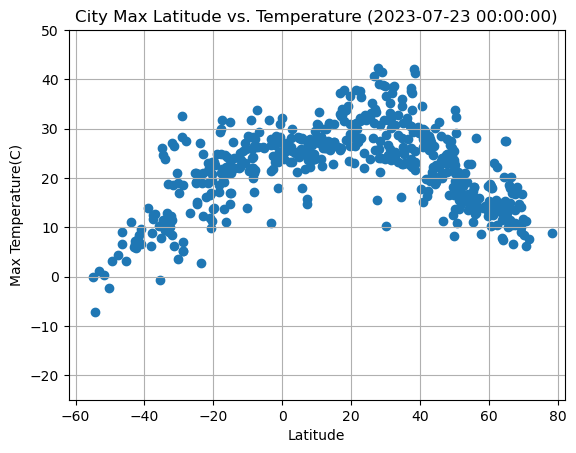

In [13]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"].tolist()
y_axis = city_data_df["Max Temp"].tolist()

plt.scatter(x_axis,y_axis)

#today's date
todays_date=pd.to_datetime('today').normalize()

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({todays_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.ylim(-25, 50)
plt.xlim(-62, 82)
plt.grid()

# # Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

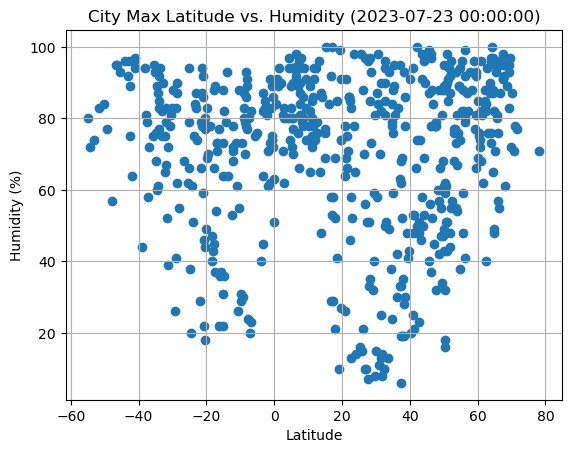

In [16]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"].tolist()
y_axis = city_data_df["Humidity"].tolist()

plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({todays_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.ylim(18, 105)
# plt.xlim(-62, 82)
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

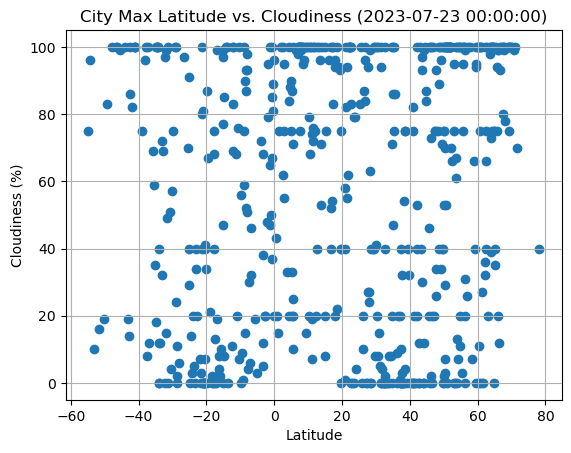

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"].tolist()
y_axis = city_data_df["Cloudiness"].tolist()

plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Cloudiness ({todays_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.ylim(-5, 105)
# plt.xlim(-62, 82)
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

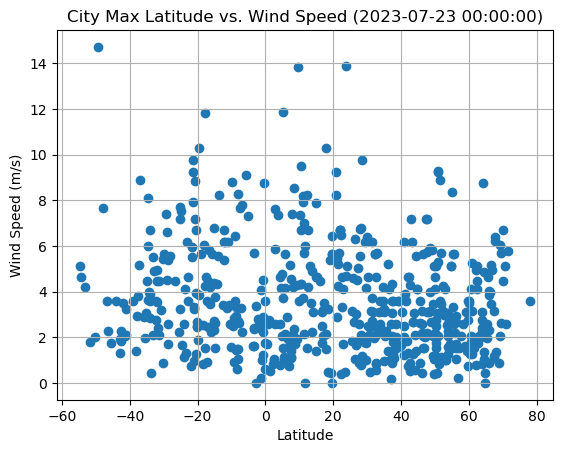

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"].tolist()
y_axis = city_data_df["Wind Speed"].tolist()

plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Wind Speed ({todays_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# plt.ylim(-5, 16)
# plt.xlim(-62, 82)
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, text_coordinates):
    
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    

    

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,at taj,24.2049,23.2857,31.68,14,4,5.13,LY,1690057450
6,la'ie,21.6477,-157.9253,29.98,71,62,5.70,US,1690057457
7,moberly,39.4184,-92.4382,30.24,41,40,3.60,US,1690057458
10,poyarkovo,49.6000,128.6833,18.16,81,100,1.16,RU,1690057461
11,zouerate,22.7187,-12.4521,37.62,13,0,4.66,MR,1690057462


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.13,77,83,14.72,TF,1690057285
2,waitangi,-43.9535,-176.5597,11.01,96,100,3.58,NZ,1690057451
3,avarua,-21.2078,-159.7750,22.03,94,100,9.26,CK,1690057452
4,edinburgh of the seven seas,-37.0676,-12.3116,12.70,72,12,8.91,SH,1690057454
5,invercargill,-46.4000,168.3500,6.65,95,100,2.26,NZ,1690057456


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6297545394456983


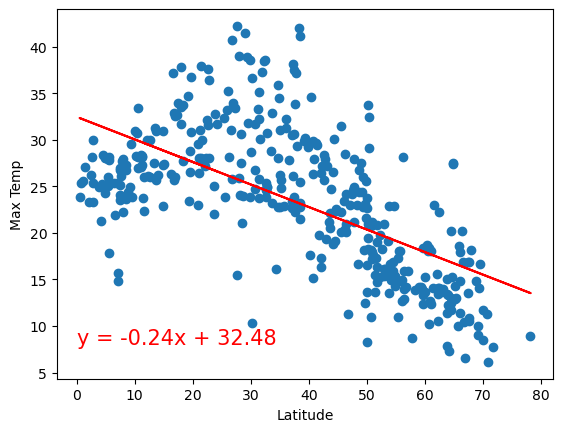

In [84]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(0,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


The r-value is: 0.7596535583082108


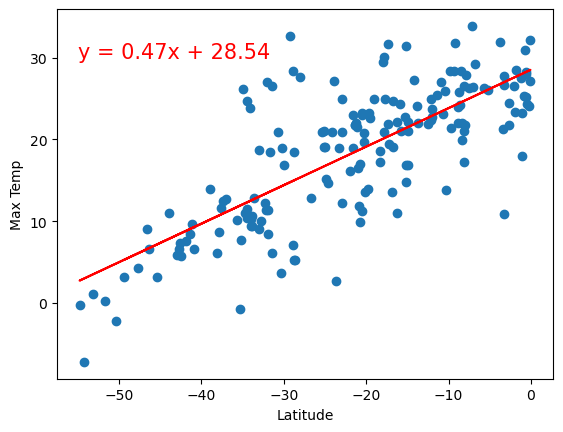

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(-55, 30))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()


**Discussion about the linear relationship:** 
In the northern hemisphere, there is a negative correlation between latitude and maximum temperature. This means as latitude increases, maximum temperature decreases. The opposite is observed in the southern hemisphere with a positive correlation between the two variables. The r values are between 0.5 and 1 in both hemisphere.There is a moderate negative relationship between maximum temperature and latitude in the northern hemisphereand a moderate positive relationship between temperature and latitude in the southern hemisphere. Both plots show a linear relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02574571501839289


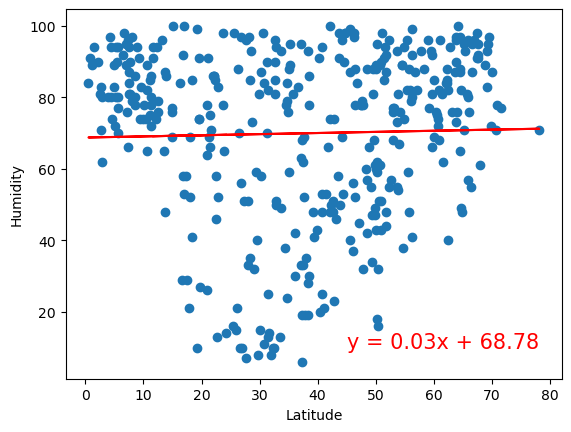

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(45,10))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.2199129585999442


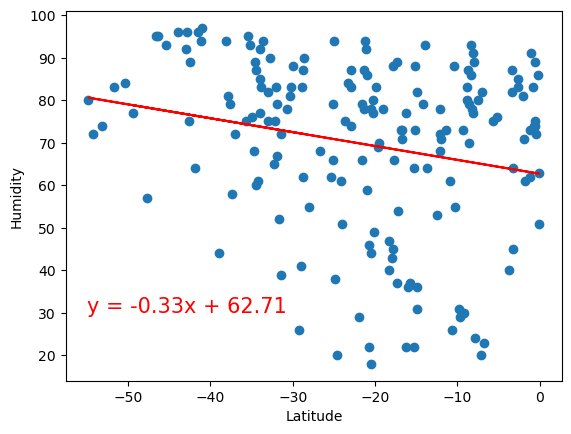

In [87]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(-55, 30))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
By observing the plots of the northenr and southern hemisphere for humiditiy, there is no clear linear pattern between latitude and humidity. This is supported by the r-value of both plots. The r value for northern hemisphere is -0.22 and the r value for the southern hemisphere is 0.03. The r value of the northern hemisphere plot indicates a very weak positive relaionship between latitude and humidity. The r value of the southern hemisphere plot indicates a weak negative relaionship between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00843195020588137


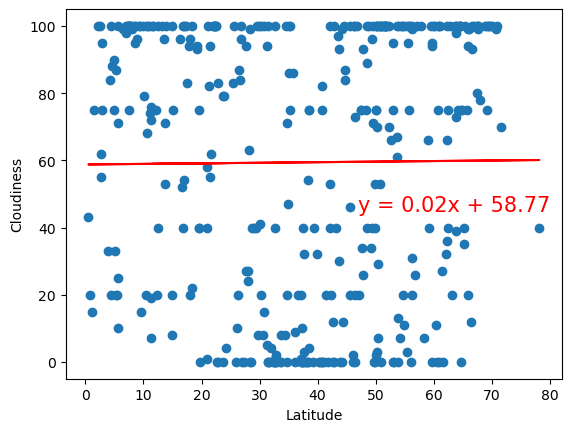

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(47,45))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.10238857113315267


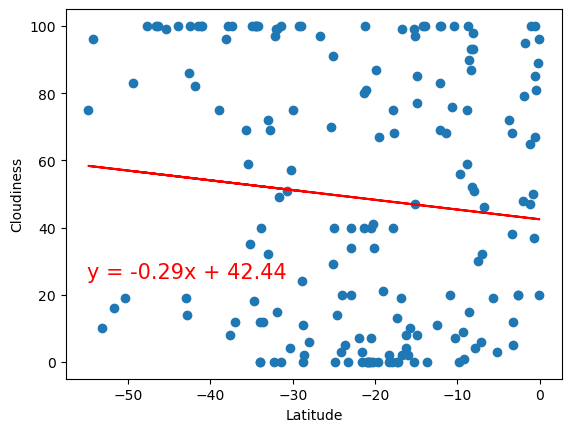

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(-55, 25))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:**
By observing the plots of the northern and southern hemisphere for cloudiness, there is no clear linear pattern between latitude and cloudiness. This is supported by the r-value of both plots. The r value for northern hemisphere is 0.008 and the r value for the southern hemisphere is -0.01. The r value of the northern hemisphere plot indicates a very weak positive relaionship between latitude and cloudiness. The r value of the southern hemisphere plot indicates a very weak negative relaionship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.15337231539296803


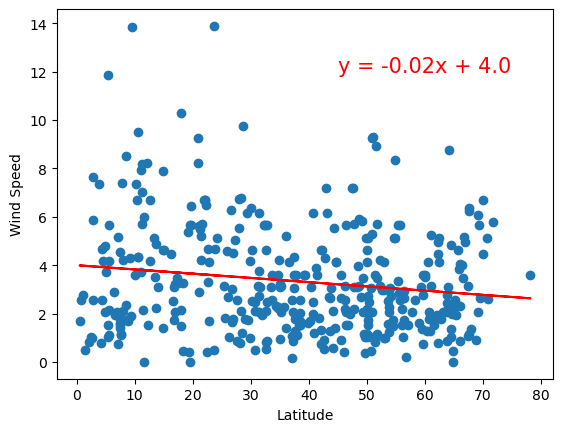

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(45,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.07377077400594921


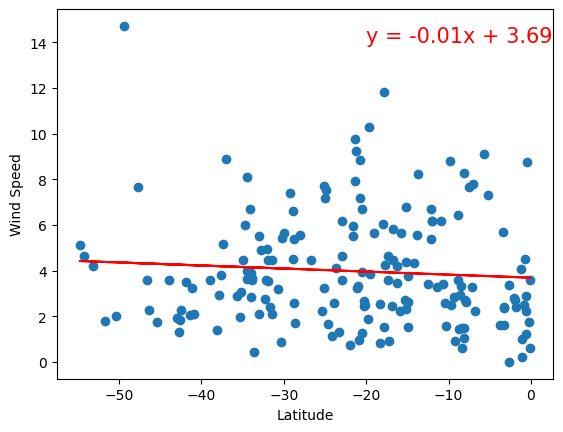

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
plot_linear_regression(x_values, y_values,(-20, 14))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
By observing the plots of the northern and southern hemisphere for wind speed, there is no clear linear pattern between wind speed and latitude. This is supported by the r-value of both plots. The r value for northern hemisphere is -0.15 and the r value for the southern hemisphere is -0.07. The r value of the northern hemisphere plot indicates a weak negative relaionship between latitude and wind speed. The r value of the southern hemisphere plot also indicates a very weak negative relaionship between latitude and wind speed.